In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [10]:
cpu_temps = np.loadtxt("CPU_temp_Celsius.txt") # Import data from text files
bat_temps = np.loadtxt("Battery_temp_Celsius.txt")
fan_RPM = np.loadtxt("Fan_RPM.txt")
fan_RPM = fan_RPM/100                           # Rescale fan speed data (for aesthetic purposes)
t = np.linspace(0, 79557, num=79557)            # Generate time array for plotting
t=t/60
cpu_temps

array([ 64.25,  64.38,  63.75, ...,  59.75,  59.75,  59.63])

In [11]:
cpu_avg = np.average(cpu_temps) # Calculate average for comparison
bat_avg = np.average(bat_temps) 

CPU_avg = np.array([cpu_avg for i in xrange(len(cpu_temps))])
Bat_avg = np.array([bat_avg for i in xrange(len(bat_temps))])

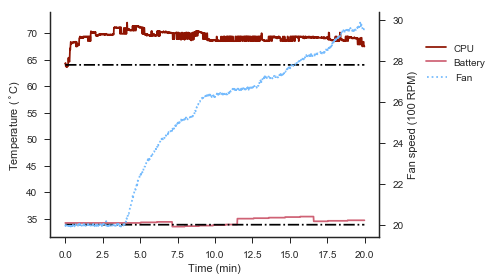

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.grid(False)
ax2.grid(False)
sns.set_style("ticks")
sns.despine(fig, right=False, top=True)

# Select data range
start = 0
end = 1200

# Plot temperature time series data
ax1.plot(t[start:end], cpu_temps[start:end], color=sns.xkcd_rgb["brick red"], label="CPU")
ax1.plot(t[start:end], bat_temps[start:end], color=sns.xkcd_rgb["rose"], label="Battery")

# Plot averages
ax1.plot(t[start:end], CPU_avg[start:end], linestyle='-.' , color='k')
ax1.plot(t[start:end], Bat_avg[start:end], linestyle='-.', color='k')

# Plot fan speed time series data
ax2.plot(t[start:end], fan_RPM[start:end], linestyle=":", color=sns.xkcd_rgb["sky blue"] , label="Fan")


ax1.set_xlabel("Time (min)")
ax1.set_ylabel("Temperature ($^\circ$C)")
ax2.set_ylabel("Fan speed (100 RPM)")
ax1.legend(bbox_to_anchor=(1.35,.9))
ax2.legend(bbox_to_anchor=(1.3103,.77))
fig.show()
plt.tight_layout()
plt.savefig("Temp_fspeed_timeseries.png", bbox_inches='tight')

In [77]:
import pyhht as hht
from pyhht.visualization import plot_imfs
from scipy.signal import hilbert

Mode 2, Iteration 600
2 minima > 0; 3291 maxima < 0.
Mode 4, Iteration 800
2 minima > 0; 1042 maxima < 0.
Mode 4, Iteration 1000
1 minima > 0; 1057 maxima < 0.
Mode 10, Iteration 1200
2 minima > 0; 20 maxima < 0.
Mode 12, Iteration 1400
0 minima > 0; 8 maxima < 0.
2
3
4
5
6
7
8
9
10
11
12
13
14


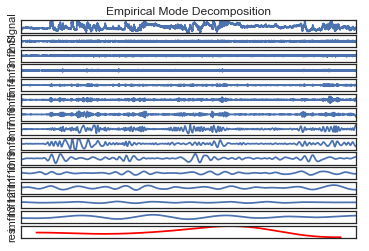

In [41]:
decomposer = hht.emd.EMD(cpu_temps)
imfs = decomposer.decompose()
plot_imfs(cpu_temps, imfs, t)

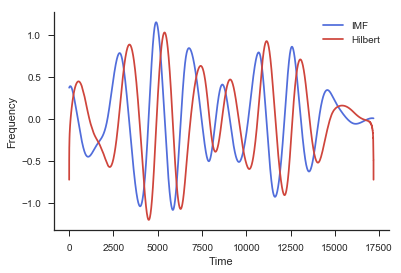

In [119]:
# for i in xrange(4):
#     s = imfs[i][:]
#     ht = hilbert(s)
#     test = 1/(2*np.pi)*np.arctan(ht)
#     plt.plot(t, test, color=sns.color_palette('coolwarm', 12)[i])
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style("ticks")
sns.despine(fig, right=True, top=True)

s = imfs[-3][:]
ht = hilbert(s)
ax.plot(t,np.real(ht), color=sns.color_palette('coolwarm', 12)[0], label = "IMF")
ax.plot(t,np.imag(ht), color=sns.color_palette('coolwarm', 12)[-1], label = "Hilbert")

ax.legend(loc="best")
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
fig.show()

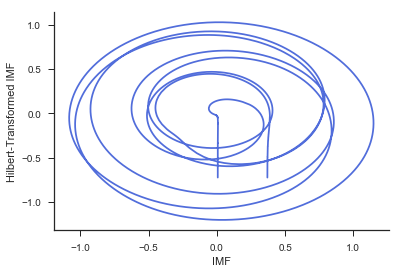

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style("ticks")
sns.despine(fig, right=True, top=True)

ax.plot(np.real(ht), np.imag(ht), color=sns.color_palette('coolwarm', 12)[0])

ax.set_xlabel('IMF')
ax.set_ylabel('Hilbert-Transformed IMF')
fig.show()